# 경사 하강법(Gradient Descent)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Machine( ) 정의

* numpy Package

In [2]:
import numpy as np

* def Machine( )

In [3]:
def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

* x, w, b 객체 지정

In [4]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

* Machine( ) 테스트

In [5]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

# II. Gradient( ) 정의
* def Gradient( )

In [6]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))

    return dw, db

* Gradient( ) 테스트

In [7]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [8]:
print('dw is ', dw)
print('db is ', db)

dw is  66.0
db is  10.0


# III. Learning( ) 정의
* def Learning( )

In [9]:
def Learning(x, y, w, b, step):
    dw, db = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    return uw, ub

* Learning( ) 테스트

In [10]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [11]:
print('Updated_w is ', '%.3f' % uw)
print('Updated_b is ', '%.3f' % ub)

Updated_w is  -1.300
Updated_b is  0.500


# IV. testData.csv에 적용

* pandas & matplotlib Packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

* Colab File Upload
 - testData.csv

In [13]:
!ls -l

total 132
drwxr-xr-x 1 root root   4096 Feb 24 17:49 sample_data
-rw-r--r-- 1 root root 128698 Feb 26 00:33 testData.csv


* testData.csv Information

In [14]:
DATA = pd.read_csv('testData.csv')

In [15]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [16]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


* testData.csv Visualization

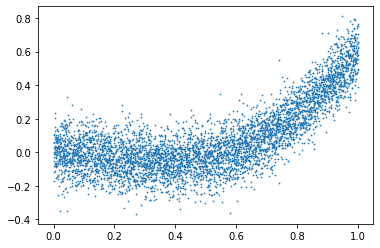

In [17]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

* 1500번 학습 실행

In [22]:
w = 2
b = 3
step = 0.05 

In [23]:
for i in range(0, 3000):
    uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub

In [24]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


* 학습결과 회귀선 그리기

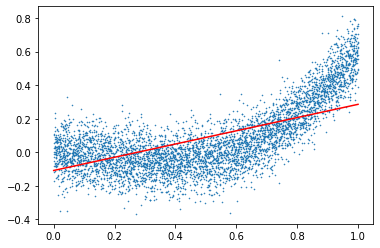

In [39]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

# V. Loss Visualization

* Gradient( )에 Loss 추가

In [26]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    Loss = np.mean((y - y_hat)**2)

    return dw, db, Loss

* Learning( )에 Loss 추가

In [27]:
def Learning(x, y, w, b, step):
    dw, db, Loss = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    Loss = Loss

    return uw, ub, Loss

* 1500번 학습 실행

In [34]:
w = 0.2
b = 0.3
step = 0.001
Error = []

In [35]:
for i in range(0, 3000):
    uw, ub, Loss = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    Error.append(Loss)

* Loss 감소 확인

In [36]:
Error[0:10]

[15.595575679087696,
 15.516493615452518,
 15.437813155278901,
 15.359532259084617,
 15.28164889774523,
 15.204161052440144,
 15.127066714601533,
 15.050363885861731,
 14.97405057800144,
 14.898124812898125]

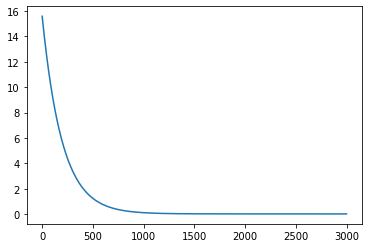

In [37]:
plt.plot(Error)
plt.show()

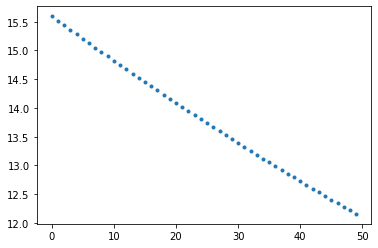

In [32]:
plt.plot(Error[0:50], '.')
plt.show()

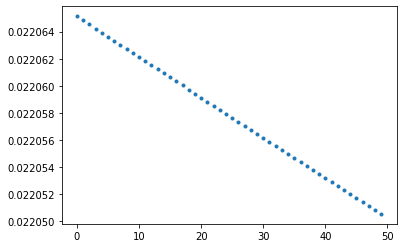

In [38]:
plt.plot(Error[2950:3000], '.')
plt.show()

# 
# 
# 
# The End
# 
# 
# 